In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [12]:
import json
import numpy as np

def read_logs(read_path):
    logs = {}
    for solver_name in os.listdir(read_path):
        solver_path = os.path.join(read_path, solver_name)
        with open(solver_path, 'r') as f:
            logs_solver = json.load(f)
        if "dpt" in solver_name.lower() or "ad" in solver_name.lower():
            for k in logs_solver.keys():
                logs[solver_name.split(".")[0] + "-" + k] = logs_solver[k]
        else:
            logs[solver_name.split(".json")[0]] = logs_solver
    return logs

def plot_logs(logs, solvers=[], title="1000 problems"):
    solvers = solvers if len(solvers) else logs.keys()

    cmap = plt.get_cmap('jet')
    colors = cmap(np.linspace(0.05, 0.95, len(solvers)))
    for solver, c in zip(solvers, colors):
        logs_solver = logs[solver]
        plt.plot(logs_solver['m_list'], logs_solver['y_list (mean)'], c=c, label=solver)

    plt.title(title)
    plt.ylabel("y", rotation=0)
    plt.xlabel("step")
    plt.legend(loc=1)
    
    plt.show()

In [19]:
def plot_logs_enhanced(logs, solvers=[], title="1000 problems", figname="all", value_to_subtract=0):
    solvers = solvers if len(solvers) else logs.keys()

    # Define a high-quality color palette and markers
    cmap = plt.get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, len(solvers)))
    markers = ['o', 's', 'D', '^', '>', 'p', '*', 'v',  '<']  # Different markers for distinction

    plt.figure(figsize=(8, 6), dpi=300)  # Increase figure size and resolution

    for i, (solver, c) in enumerate(zip(solvers, colors)):
        logs_solver = logs[solver]
        y_values = np.array(logs_solver['y_list (mean)'])
        plt.plot(
            logs_solver['m_list'], 
            y_values, 
            c=c, 
            label=solver, 
            linewidth=2, 
            marker=markers[i % len(markers)],  # Use distinct markers
            markersize=5, 
            markevery=10  # Show markers at intervals
        )

    # plt.yscale("log", base=2)  # Set y-axis to log scale
    plt.title(title, fontsize=18,)
    plt.ylabel("Objective value", fontsize=18, labelpad=15)
    plt.xlabel("Step", fontsize=18)
    
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability
    plt.legend(loc='best', fontsize=12, frameon=True, edgecolor='black')  # Improved legend
    plt.tight_layout()  # Adjust layout to fit everything neatly
    plt.savefig(f"{figname}.pdf")
    plt.savefig(f"{figname}.png")
    plt.show()


In [8]:
import os

In [13]:
logs = read_logs("results/QUBO_n_2_d_50_normal/")

In [14]:
logs.keys()

dict_keys(['OnePlusOne', 'PROTES', 'd_50_fat_normal_ad-AD (argmax)', 'd_50_fat_normal_ad-AD (sampling)', 'd_50_fat_normal_ad-AD (argmax warmup)', 'd_50_fat_normal_ad-AD (sampling warmup)', 'd_50_fat_normal_ad-AD (sqrt sampling)', 'd_50_fat_normal_ad-AD (rsqrt sampling)', 'd_50_fat_normal_dpt-DPT (argmax)', 'd_50_fat_normal_dpt-DPT (sampling)', 'd_50_fat_normal_dpt-DPT (argmax warmup)', 'd_50_fat_normal_dpt-DPT (sampling warmup)', 'PSO', 'Portfolio', 'RandomSearch', 'd_50_randn_ad-AD (argmax)', 'd_50_randn_ad-AD (sampling)', 'd_50_randn_ad-AD (argmax warmup)', 'd_50_randn_ad-AD (sampling warmup)', 'd_50_randn_ad-AD (5->1 sampling)'])

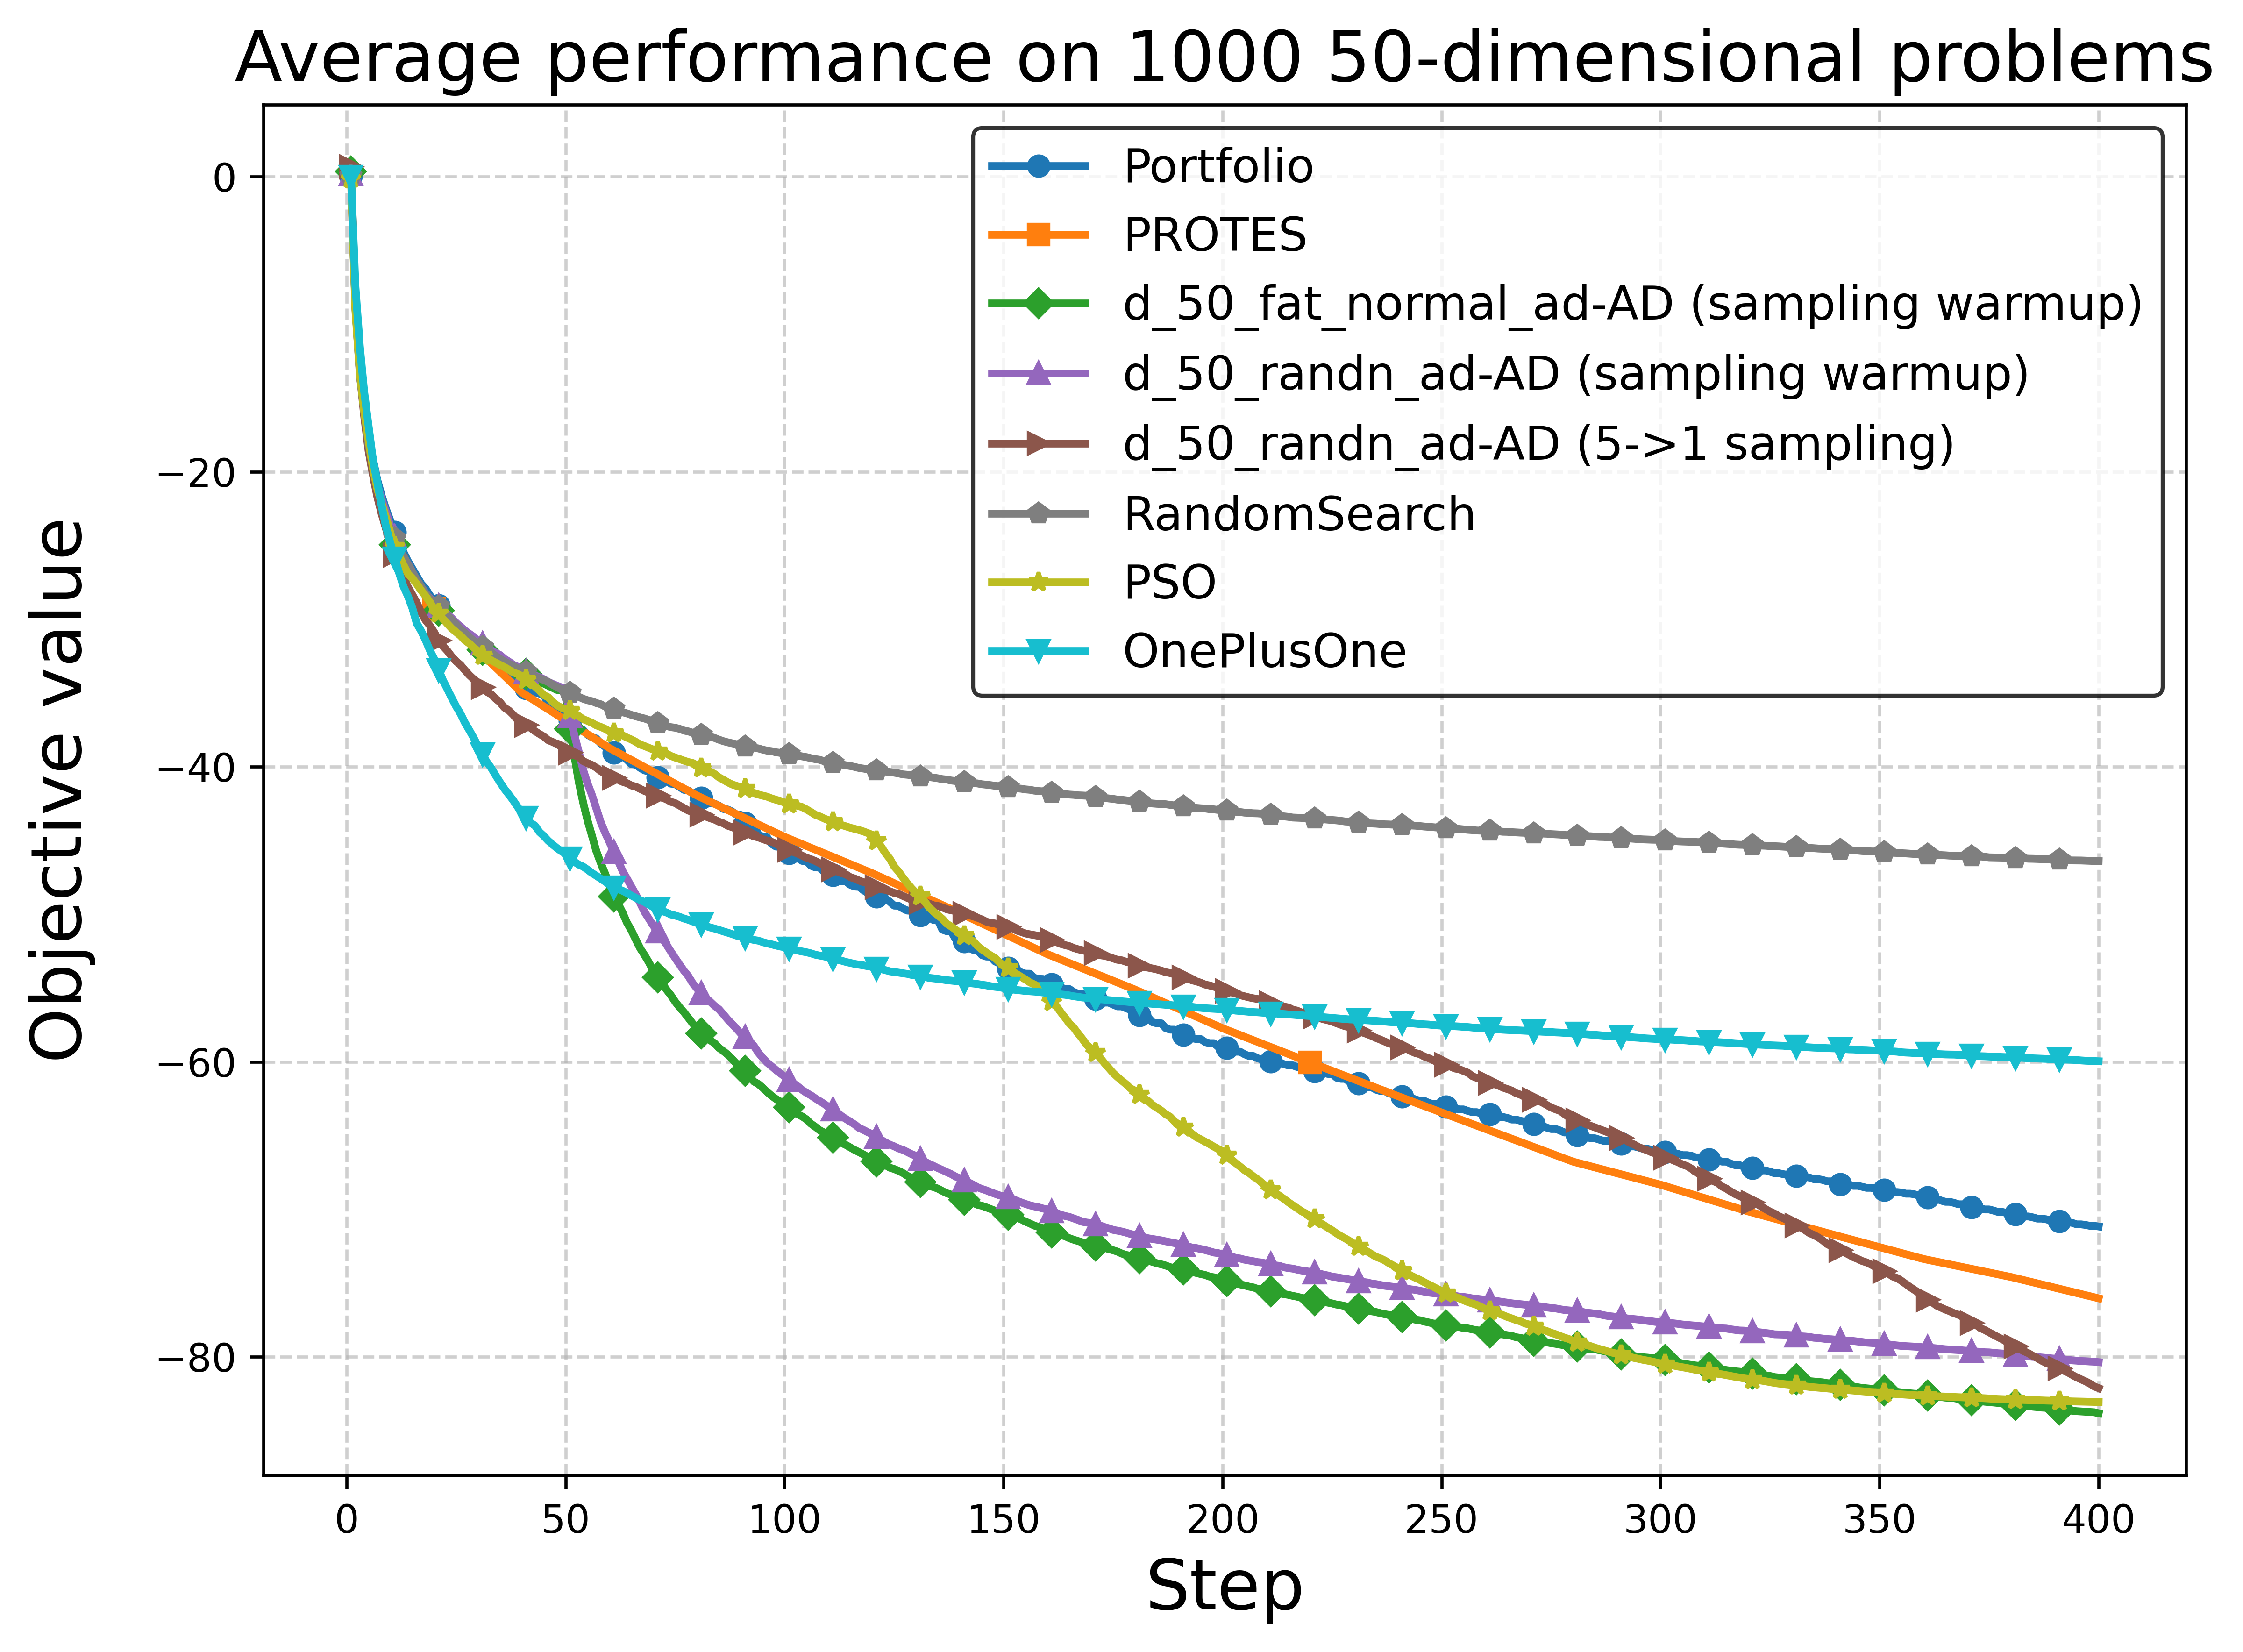

In [ ]:
keys = ['Portfolio', 'PROTES', 'd_50_fat_normal_ad-AD (sampling warmup)', 'd_50_randn_ad-AD (sampling warmup)', 'd_50_randn_ad-AD (5->1 sampling)', 'RandomSearch', 'PSO', 'OnePlusOne']
# Generate the enhanced plot with markers and log scale, subtracting 0 as an example
plot_logs_enhanced(logs, solvers=keys, value_to_subtract=0, figname="solvers_50", title="Average performance on 1000 50-dimensional problems")

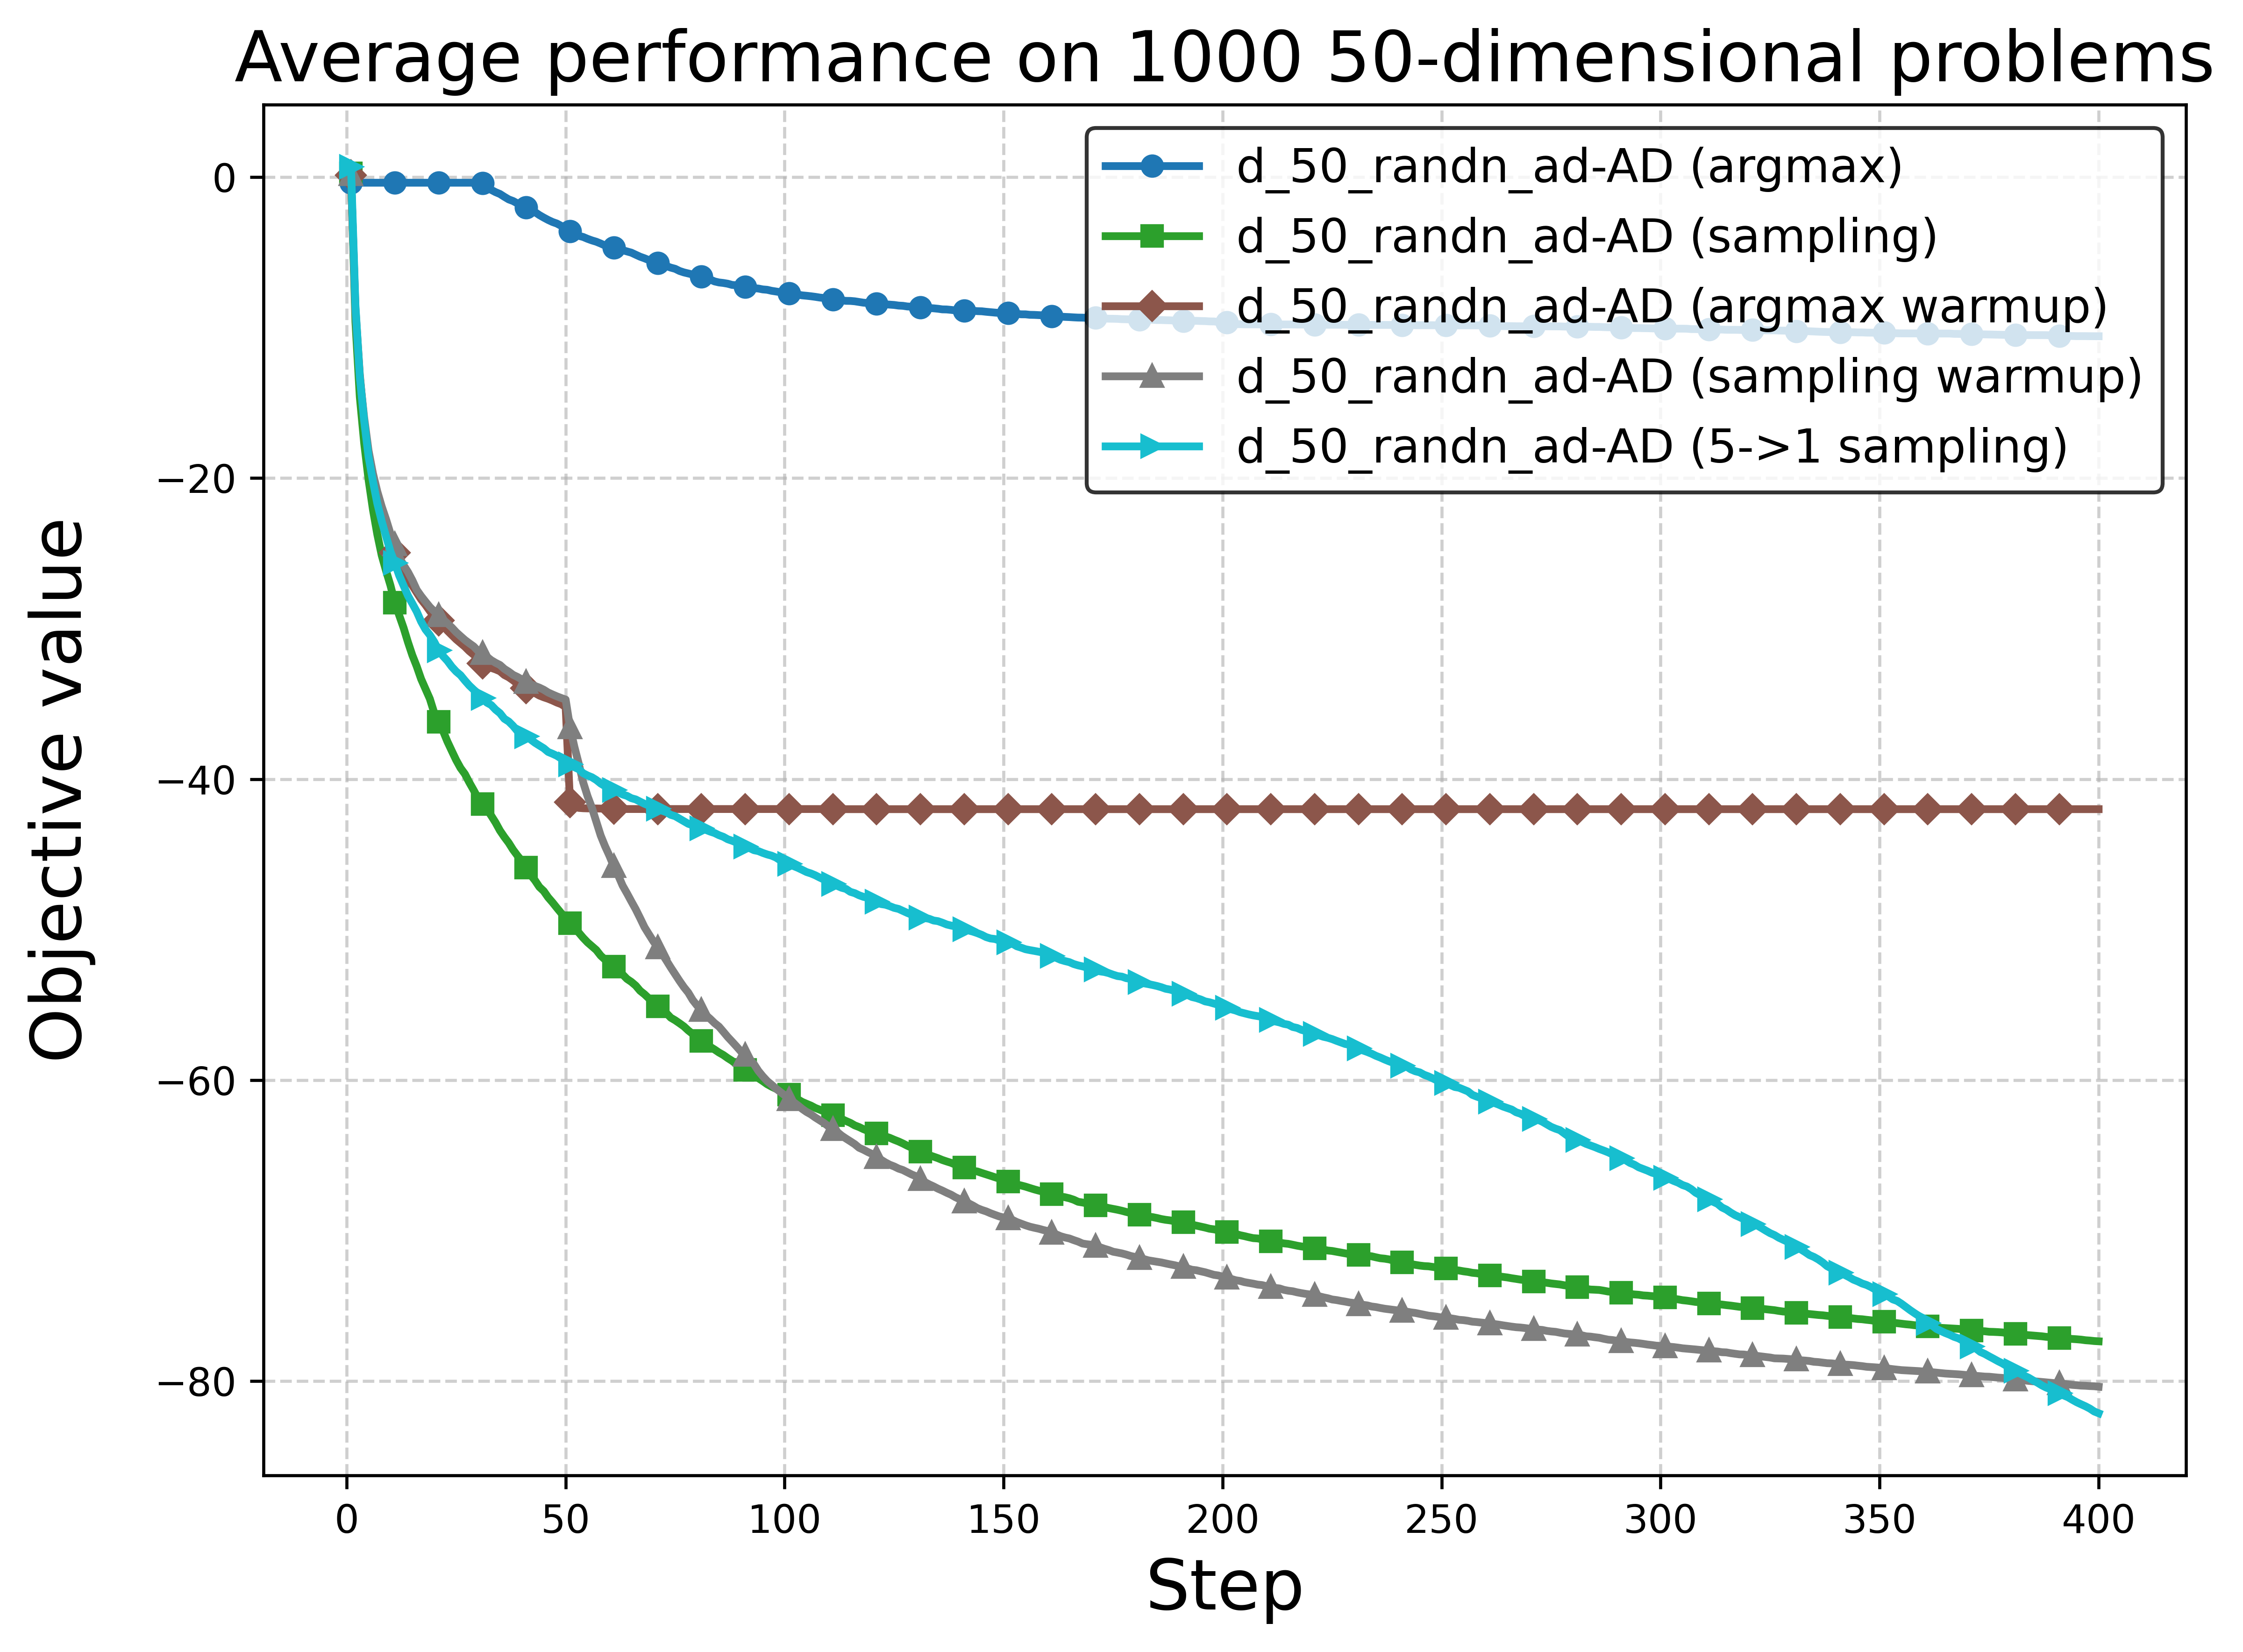

In [ ]:
keys = ['d_50_randn_ad-AD (argmax)', 'd_50_randn_ad-AD (sampling)', 'd_50_randn_ad-AD (argmax warmup)', 'd_50_randn_ad-AD (sampling warmup)', 'd_50_randn_ad-AD (5->1 sampling)']
plot_logs_enhanced(logs, solvers=keys, value_to_subtract=0, figname="ad_50_new_reward", title="Average performance on 1000 50-dimensional problems")

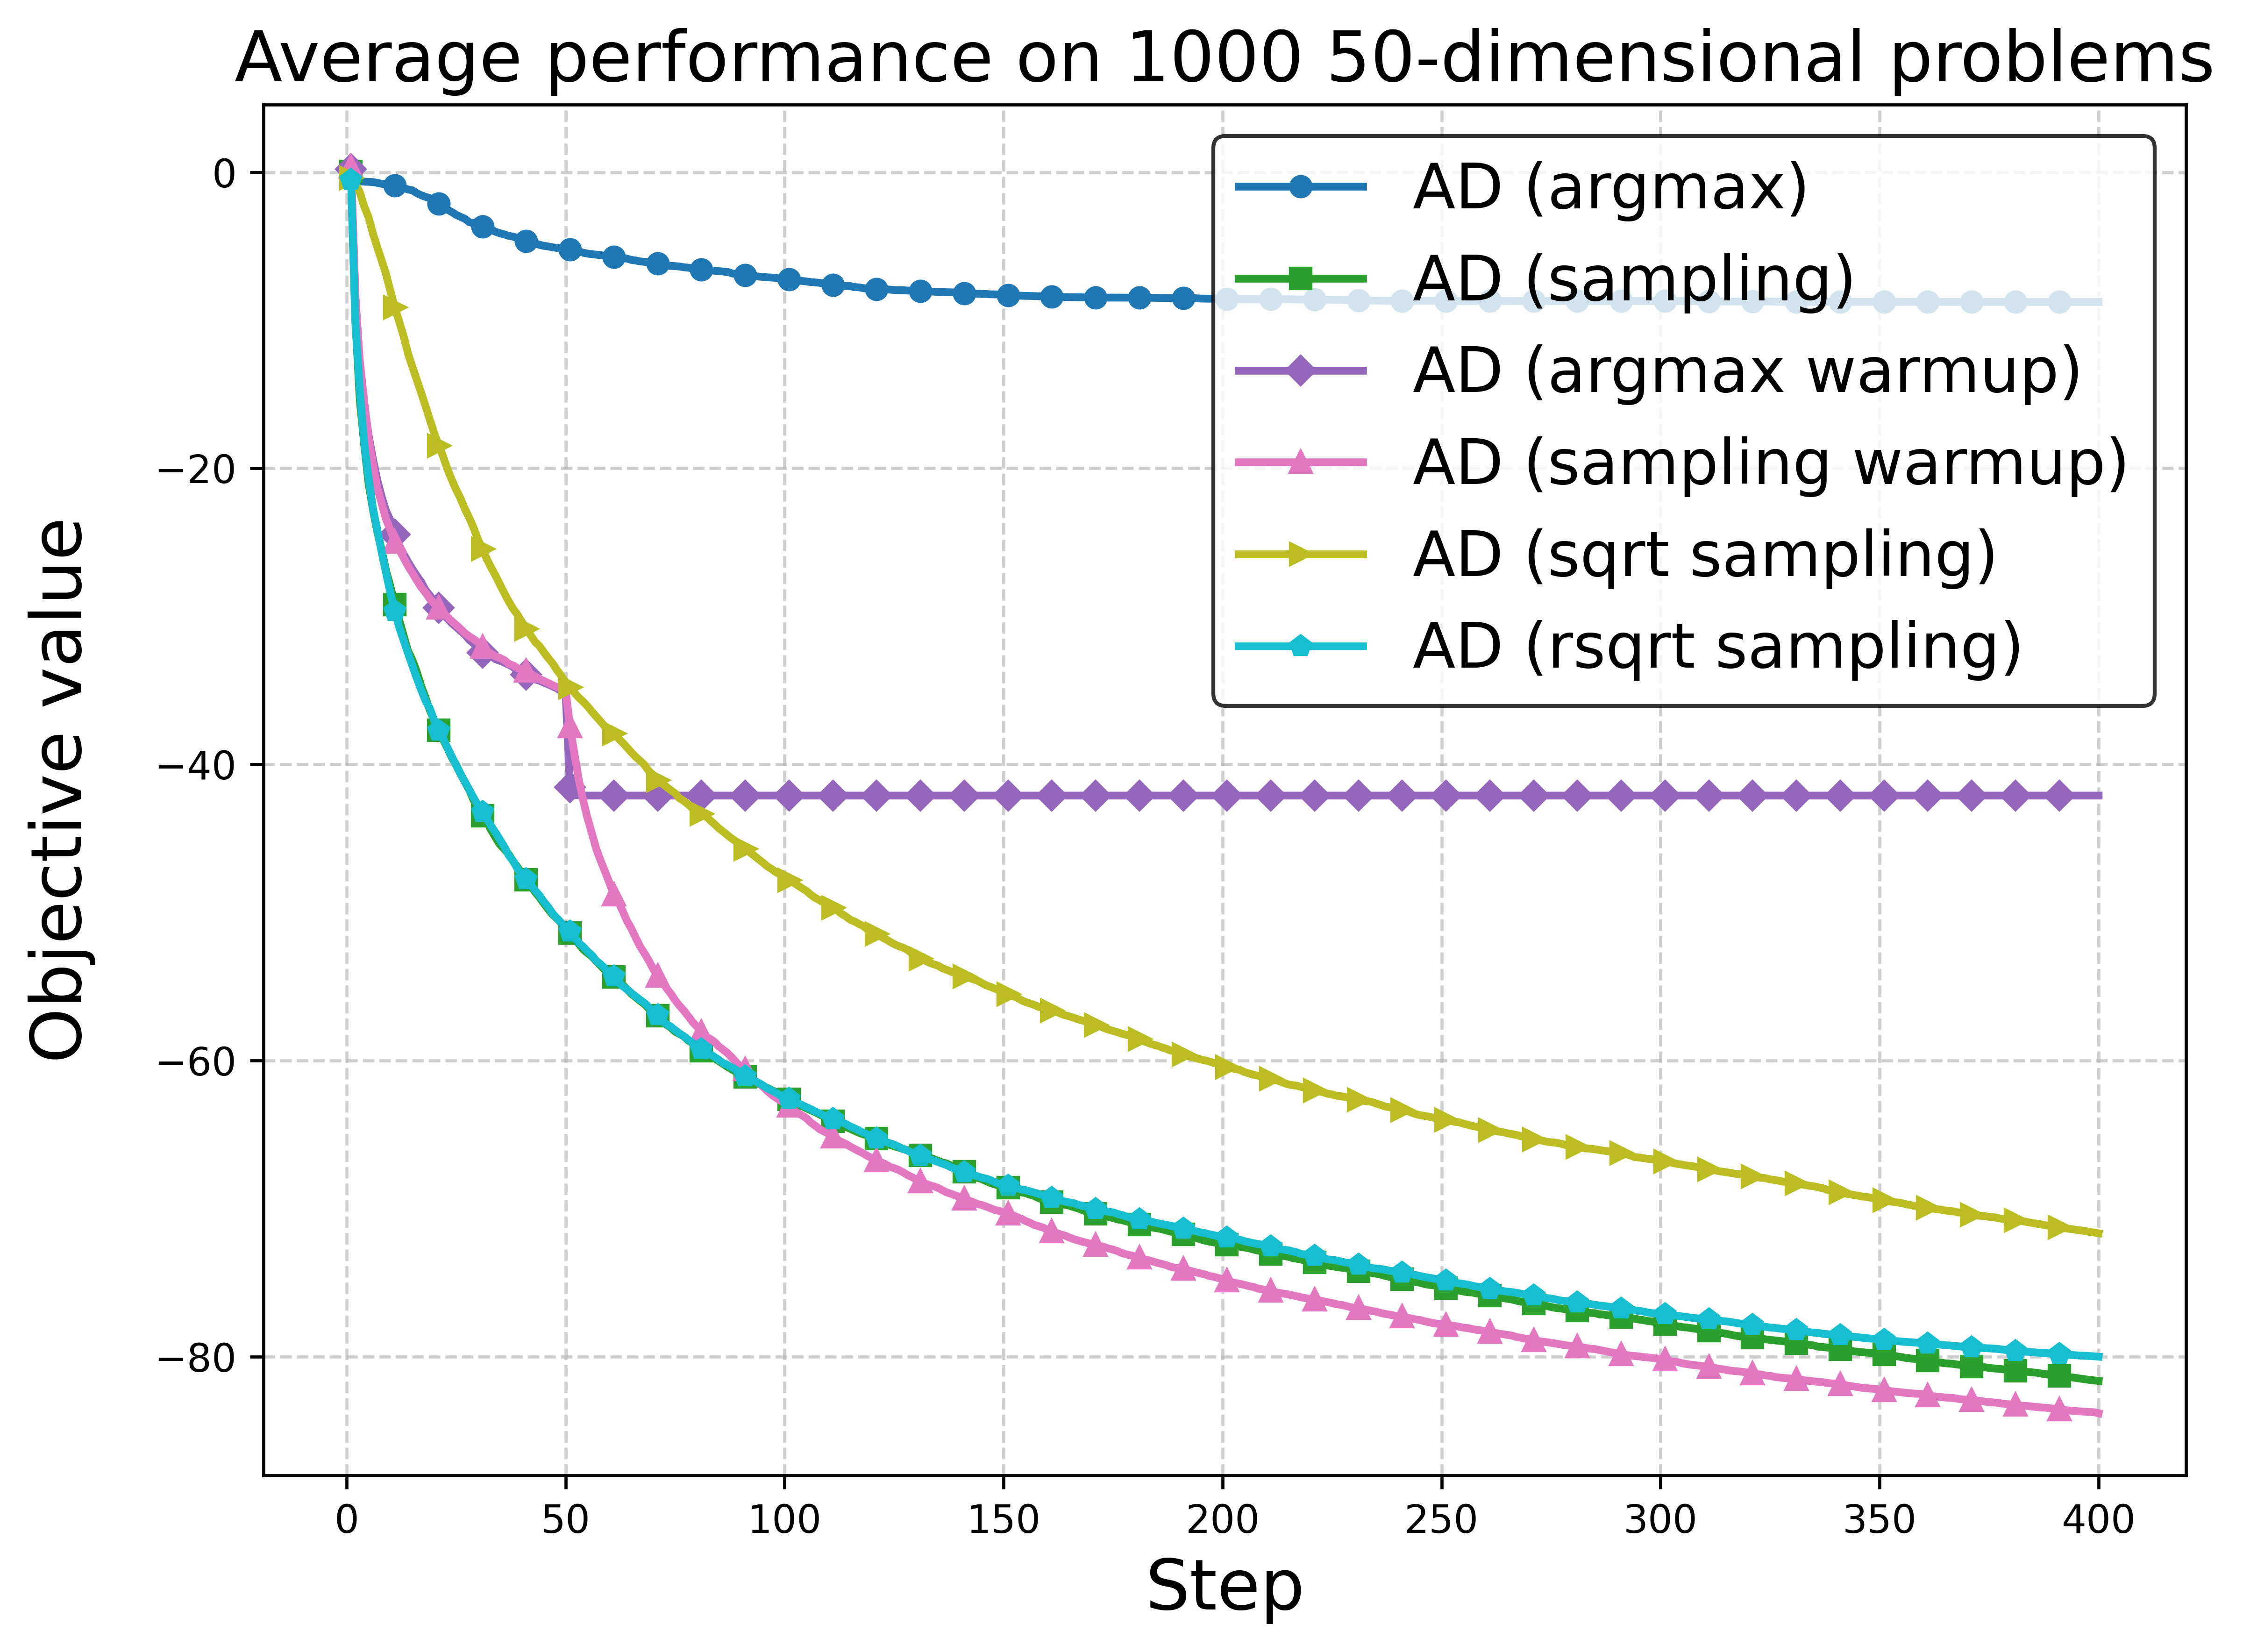

In [45]:
keys = ['AD (argmax)', 'AD (sampling)', 'AD (argmax warmup)', 'AD (sampling warmup)', 'AD (sqrt sampling)', 'AD (rsqrt sampling)']
# Generate the enhanced plot with markers and log scale, subtracting 0 as an example
plot_logs_enhanced(logs, solvers=keys, value_to_subtract=0, figname="ad_50", title="Average performance on 1000 50-dimensional problems")

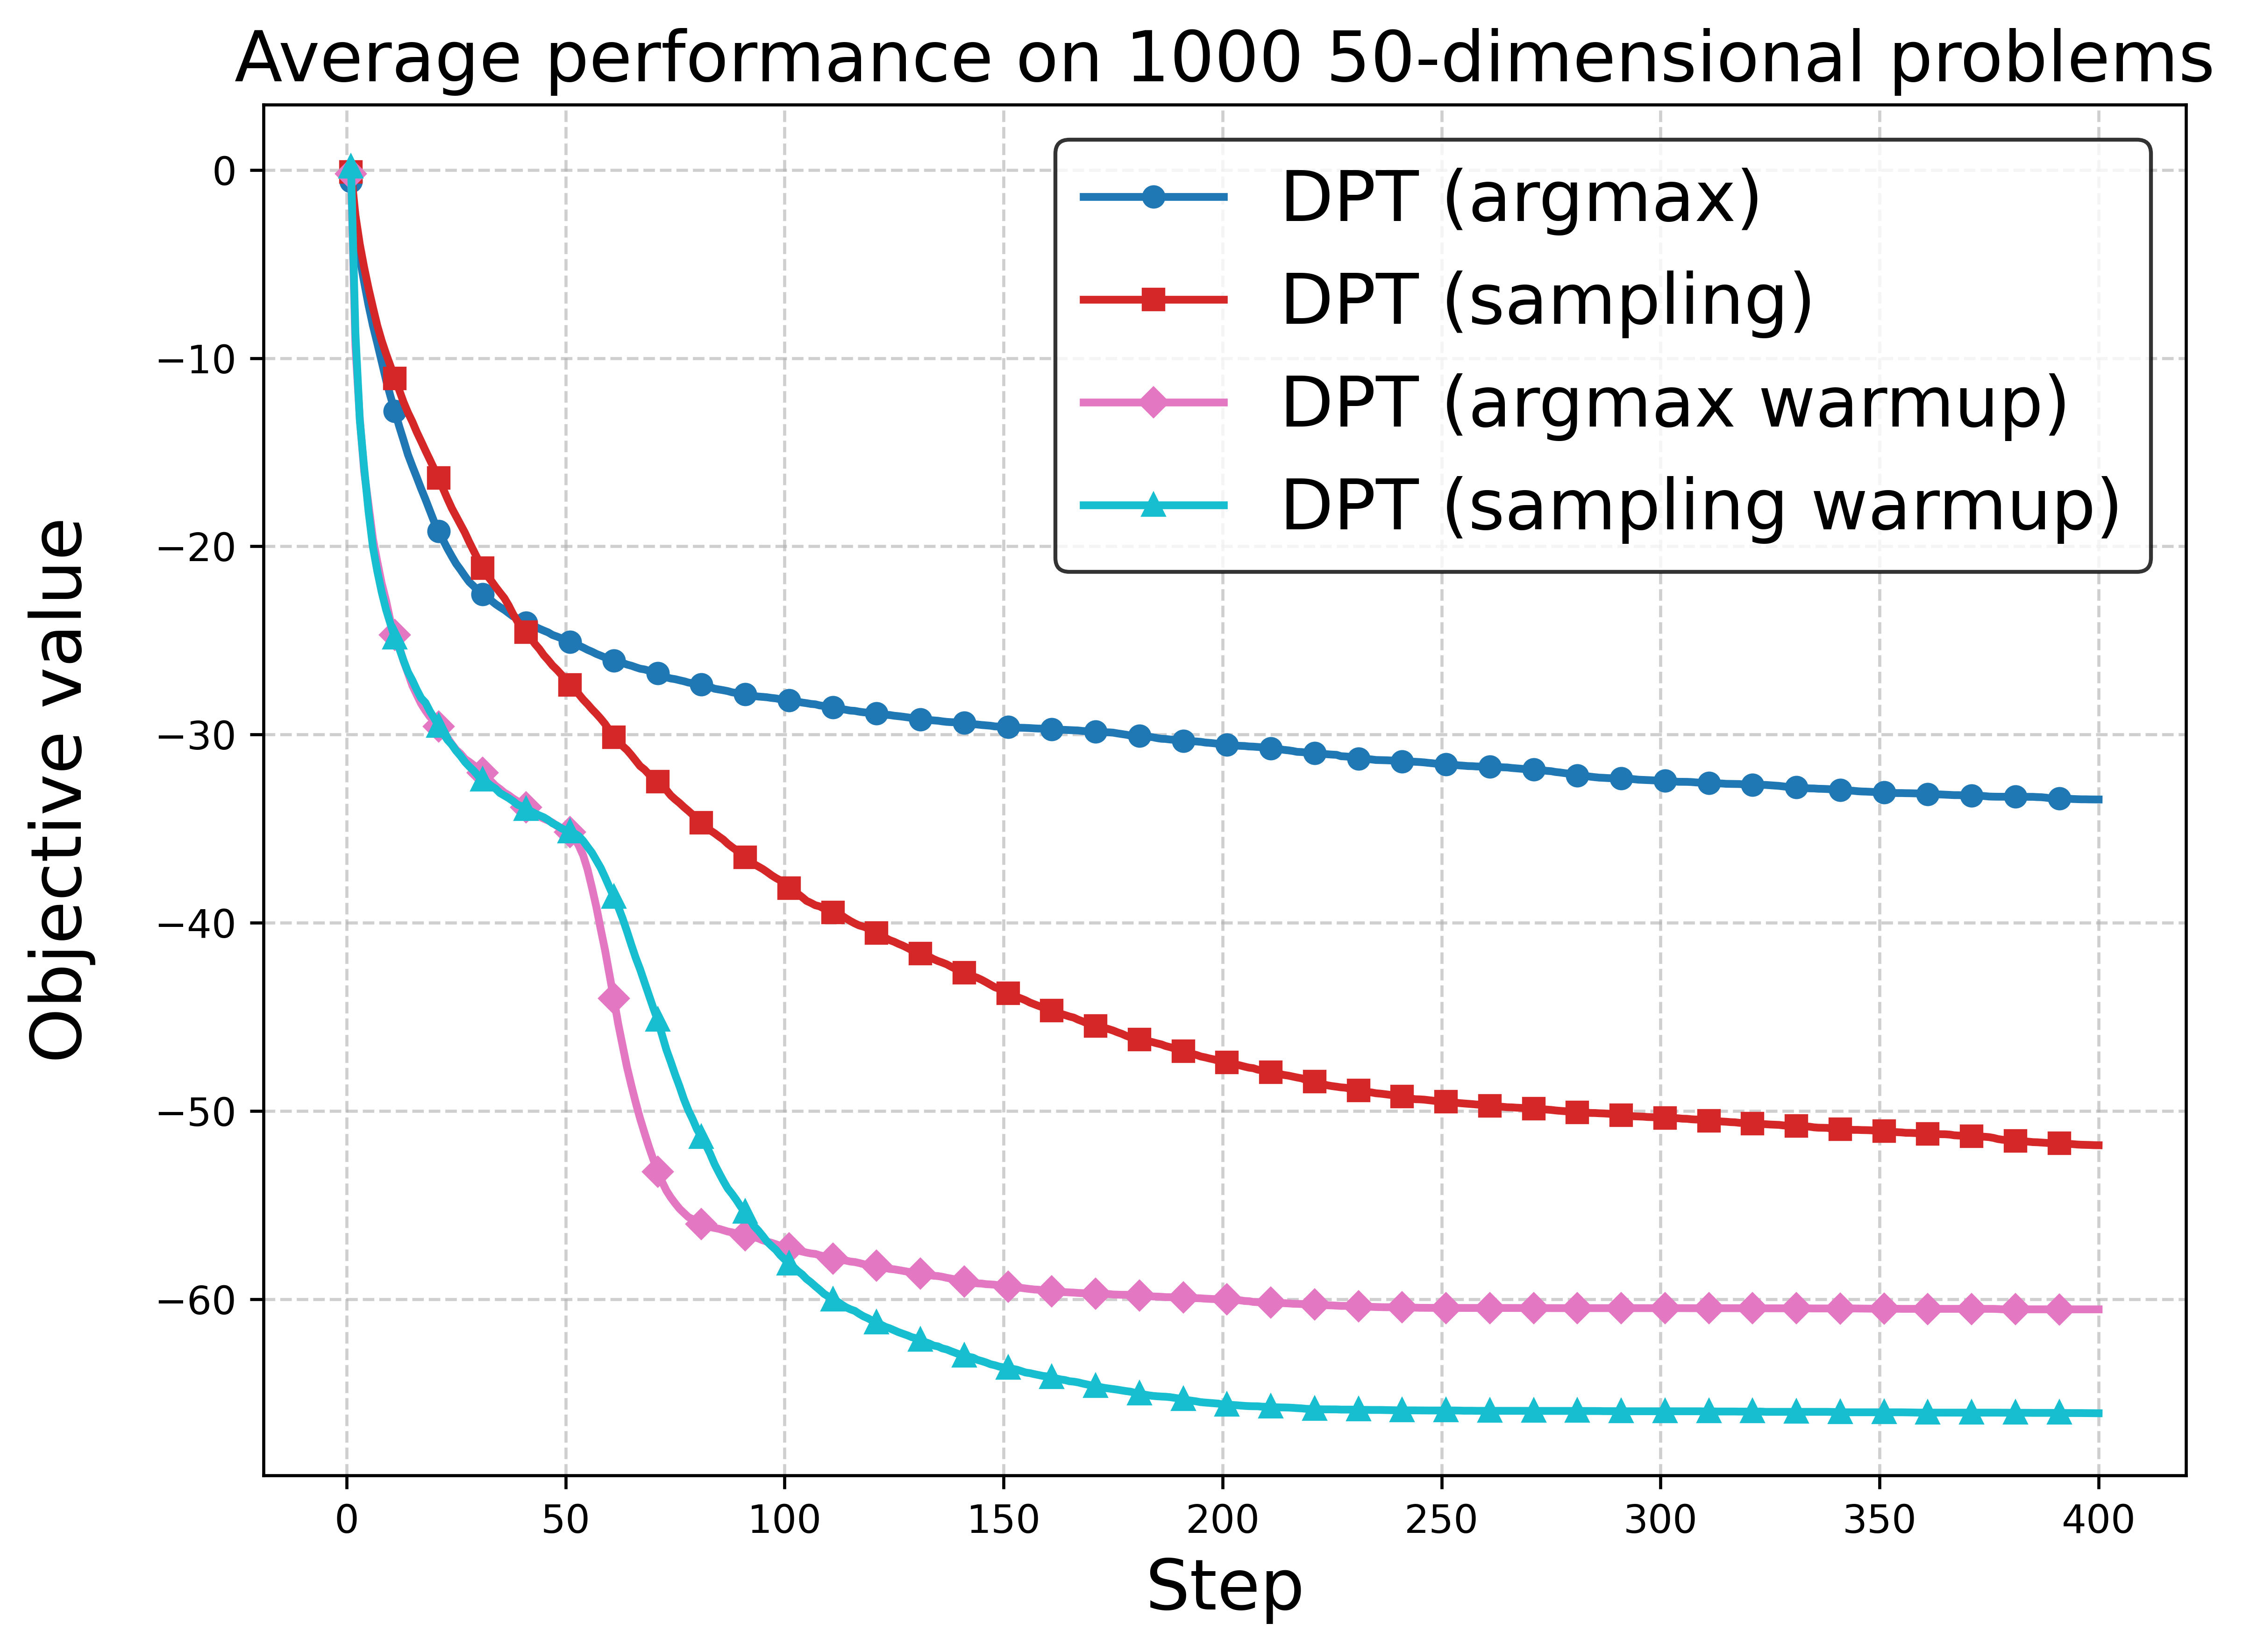

In [ ]:
keys = ['DPT (argmax)', 'DPT (sampling)', 'DPT (argmax warmup)', 'DPT (sampling warmup)']
# Generate the enhanced plot with markers and log scale, subtracting 0 as an example
plot_logs_enhanced(logs, solvers=keys, value_to_subtract=0, figname="dpt_50", title="Average performance on 1000 50-dimensional problems")